# Python for Data Science Teaching Session 3: Data Processing

## Introduction

### Session Objectives

- Creating arrays and accessing elements
- Reshaping and combining arrays
- Arithmetic and aggregations
- Filtering and sorting

## Getting Started with NumPy

### What is NumPy?

In one word, fast. NumPy is a Python package (and part of the SciPy stack) devoted to processing and performing mathematical operations on data. Although faster solutions do exist ([Numba](https://numba.pydata.org/), [TensorFlow](https://www.tensorflow.org/overview), etc.), NumPy is powerful enough for almost all use cases.

The backbone of NumPy is the array. These arrays differ from Pandas dataframes and base Python lists in two ways:

- The same datatype must be used for all elements in an array
- Every axis (dimension) must contain blocks of the same shape (i.e. arrays are rectangular, cuboidal, etc.)

Because we have consistent types and structure, operations on NumPy arrays can be performed much faster than methods we've seen so far.

> **Technical Note**
>
> Technically, the second rule can be relaxed, in which case we obtain what is known as a _ragged array_. This however loses most of the efficiency of NumPy so is advised against.

Typically we import `numpy` under the alias `np`

In [2]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Creating an Array

#### From Lists

The simplest way to create an array is by passing a number, list, list-of-lists, etc. into `np.array`. As with, Pandas dataframes, we can then view the dimensions of the array with the `.shape` attribute.

In [3]:
# Create a 0-D array and print its shape
arr = np.array(42)
print(arr)
print(arr.shape)

42
()


In [4]:
# Create a 1-D array and print its shape
arr = np.array([1, 2, 3])
print(arr)
print(arr.shape)

[1 2 3]
(3,)


> **An Idea to Ponder**
>
> What is the difference between `(3)` and `(3,)`? Perhaps look at their `type(...)`.

In [5]:
# Create a 2-D array and print its shape
arr = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print(arr)
print(arr.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


If we provide lists containing different datatypes, NumPy will try to coerce them into the same type (giving an error if this process fails).

In [6]:
# Create an array from different data types
arr = np.array([
    [True, 2],
    [3.0, 4]
])
arr

array([[1., 2.],
       [3., 4.]])

In general, it can be hard to predict what datatype you will obtain when doing this, so it is best practice to ensure that you have the same datatype _before_ creating an array.

> **Further Reading**
>
> You can convert between types by using the `.astype()` method of a NumPy array, passing in one of the types listed [here](https://numpy.org/devdocs/user/basics.types.html). E.g. `arr.astype(np.int32)`.

Notice, that by nesting lists in lists, you can create arrays with different dimensions that contain the same data.

In [7]:
# Create arr1, arr2 with the same data but different dimensions
arr1 = np.array(1)
arr2 = np.array([[1]])
print(arr1.shape, arr2.shape)

() (1, 1)


#### Random Arrays

NumPy has the ability to create random arrays. This is done using the `random` submodule whose documentation can be found [here](https://numpy.org/doc/1.16/reference/routines.random.html).

In [8]:
# Create a 3x2x3 grid of random integers between 1 and 100
arr = np.random.randint(1, 101, size=(3, 2, 3))
arr

array([[[56, 73, 25],
        [32, 45, 56]],

       [[40, 89, 13],
        [42, 60, 72]],

       [[44, 21, 87],
        [75, 66, 11]]])

> **Warning**
>
> All `np.random` functions use the parameter `size` to specify the arrays `shape`. This is because many distributions such as `gamma` already have a `shape` parameter. 

We can create reproducible randomness using `np.random.seed(...)`.

In [38]:
# Set the random seed to 42 and generate 10 random standard normal samples
np.random.seed(42)
np.random.standard_normal(size=(10,))

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

#### Arrays from Dataframes

We can convert entire dataframes, series or indexes into NumPy arrays, using the `.to_numpy()` method. It is important to only do this when datatypes are consistent else this may result in unexpected type conversions or a errors.

> **Good to Know**
>
> In older versions of Pandas, the same effect could be achieved using the `.values` attribute. This is however being fazed out for the more consistent `.to_numpy()` approach. 

For example, we can extract the predictors from the iris dataset as a NumPy array.

In [9]:
# Load the iris dataset
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Extract the first 10 rows predictors as an array, X
X = iris.drop('species', axis=1).head(10).to_numpy()
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In fact, Pandas dataframes are built on top of NumPy arrays. More on this in the project session.

### Array Attributes

We have already seen the `shape` attribute of NumPy arrays. There are a few more of interest.

In [47]:
# Number of dimensions of X
X.ndim

2

In [48]:
# Datatype of X
X.dtype

dtype('float64')

In [49]:
# Number of elements in X
X.size

600

In [50]:
# Storage size for each element in X
X.itemsize

8

In [52]:
# Total storage size of X (= X.size * X.itemsize)
X.nbytes

4800

### Indexing and Slicing

We can access individual elements of an array or create sub-arrays in the exact same way we would with Python lists or Pandas dataframes using `iloc`. We can specify as many indexes or slices as we like up to number of dimensions in the array, separated by commas.

> If your knowledge of slicing is lacking, checkout [session five](https://education.wdss.io/beginners-python/session-four/) of WDSS's Beginner's Python.

In [59]:
# Create an array to slice
np.random.seed(253)
arr = np.random.random(size=(10, 5, 3))

In [61]:
# Extract the element in position (7, 4, 2)
arr[6, 3, 1]

0.7114843937577212

In [62]:
# Extract the 1D array in position (3, 4)
arr[2, 3]

array([0.13452044, 0.3347907 , 0.26034674])

In [63]:
# Extract the first value of the 3rd dimension
arr[:, :, 0]

array([[0.26205987, 0.50778879, 0.11435038, 0.41124492, 0.51218467],
       [0.99028703, 0.6962767 , 0.64491784, 0.56633963, 0.45558134],
       [0.31493584, 0.39719045, 0.84375933, 0.13452044, 0.76019337],
       [0.93490772, 0.54227946, 0.51076185, 0.80784063, 0.72523742],
       [0.50692926, 0.08742934, 0.64120215, 0.17624222, 0.86956274],
       [0.76315917, 0.35952798, 0.58121045, 0.91715346, 0.09449829],
       [0.0437028 , 0.07151266, 0.92069023, 0.8984425 , 0.73208314],
       [0.43901714, 0.55206071, 0.07054807, 0.2126681 , 0.07618652],
       [0.70016563, 0.70240438, 0.75154075, 0.1491439 , 0.66730866],
       [0.97202415, 0.85226302, 0.38743678, 0.50585151, 0.79759033]])

In [67]:
# Reverse the 2nd dimension and extract every 3rd value of the 1st dimension
arr[::3, ::-1]

array([[[0.51218467, 0.92913747, 0.74809565],
        [0.41124492, 0.77063842, 0.38333664],
        [0.11435038, 0.278223  , 0.21797983],
        [0.50778879, 0.04692032, 0.62099122],
        [0.26205987, 0.68349235, 0.52008663]],

       [[0.72523742, 0.8791117 , 0.60874428],
        [0.80784063, 0.25522802, 0.42375193],
        [0.51076185, 0.47426722, 0.3435387 ],
        [0.54227946, 0.52854479, 0.17747127],
        [0.93490772, 0.98928119, 0.86569364]],

       [[0.73208314, 0.45883571, 0.02274345],
        [0.8984425 , 0.71148439, 0.81824145],
        [0.92069023, 0.67437001, 0.26335589],
        [0.07151266, 0.82908446, 0.92543517],
        [0.0437028 , 0.01884263, 0.24144511]],

       [[0.79759033, 0.48708846, 0.12075606],
        [0.50585151, 0.82849029, 0.99082662],
        [0.38743678, 0.92663656, 0.54344937],
        [0.85226302, 0.16395977, 0.85765419],
        [0.97202415, 0.30979346, 0.12241736]]])

As with dataframes (but unlike lists) indexing and slicing copies by reference.

In [64]:
X = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
X1 = X[0]
X1 *= 2
X

array([[2, 4, 6],
       [4, 5, 6]])

To create copies, we use the `.copy()` method.

In [65]:
X = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
X1 = X[0].copy()
X1 *= 2
X

array([[1, 2, 3],
       [4, 5, 6]])

> **Further Reading**
>
> NumPy also allows indexing using arrays. This is an incredibly powerful tool for manipulating array elements but is beyond the scope of this course. You can read more about it [here](https://numpy.org/doc/stable/user/basics.indexing.html#index-arrays).

## Reshaping and Combining Arrays

### Reshaping Arrays

We can reshape an array using the `.reshape()` method, passing in the new desired shape as a tuple.

In [70]:
# Flatten a 5x5 random array
arr = np.random.random(size=(5, 5))
arr.reshape((25,))

array([0.43596861, 0.19979843, 0.84330255, 0.00131699, 0.52015289,
       0.37420111, 0.83538979, 0.78845628, 0.95699432, 0.80906816,
       0.12208534, 0.01470883, 0.16476184, 0.71825449, 0.19086781,
       0.86909496, 0.90120742, 0.22387314, 0.4913762 , 0.41367329,
       0.83469178, 0.82570056, 0.38615197, 0.43278643, 0.27999835])

We are allowed to set one dimension to have the value `-1`, in which case this will be chosen so that the size of the new array matches the original.

In [73]:
# Group a flat array into 2x2 blocks
arr = np.random.random(size=(20,))
arr.reshape((-1, 2, 2))

array([[[0.37534867, 0.23804203],
        [0.85008402, 0.30866614]],

       [[0.87730419, 0.32440306],
        [0.52518887, 0.79391798]],

       [[0.10959728, 0.91571619],
        [0.11208416, 0.20789279]],

       [[0.38367427, 0.27462576],
        [0.92792254, 0.57448497]],

       [[0.42028405, 0.62043924],
        [0.27173533, 0.33807869]]])

We can also use `reshape` to add new dummy dimensions.

In [79]:
# Turn a 2x2 array into a 1x2x2 array
np.array([[1, 2], [3, 4]]).reshape((1, 2, 2))

array([[[1, 2],
        [3, 4]]])

### Combining Arrays

NumPy has many functions for combining (and splitting arrays). For the sake of time, we will only focus on a few, though you may want to checkout the following documentation for yourself:

- [block](https://numpy.org/doc/stable/reference/generated/numpy.block.html)
- [split](https://numpy.org/doc/stable/reference/generated/numpy.split.html)
- [vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html), [hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html), [dstack](https://numpy.org/doc/stable/reference/generated/numpy.dstack.html)

One of the functions we will cover is `concatenate`, which joins a sequence of arrays along an existing axis.

In [75]:
# Combine 3 three random 2x2 arrays into a 6x2 array
X = np.random.random(size=(2, 2))
Y = np.random.random(size=(2, 2))
Z = np.random.random(size=(2, 2))
C = np.concatenate((X, Y, Z), axis=0)
C.shape

(6, 2)

A similar function is `stack`, which also joins a sequence of arrays, creating a _new_ axis in the process.

In [78]:
# Combine 3 three random 2x2 arrays into a 3x2x2 array
D = np.stack((X, Y, Z), axis=0)
D.shape

(3, 2, 2)

## Maths with NumPy

The main reason we want to use NumPy is for quick and elegant mathematical operations. These take advantage of a technique called _vectorisation_ in which operations are applied element-wise rather than to the entire array.

### Arithmetic

NumPy comes with a wide array (eh?) of built-in mathematical functions. Most are written in low-level, optimised C code so are lightning fast. A full list can be found [here](https://numpy.org/doc/stable/reference/routines.math.html). We can also use most base Python operators, which are then converted to the faster underlying functions.

In [14]:
# Create arrays to play with
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [81]:
# Add A and B
A + B

array([[ 6,  8],
       [10, 12]])

In [15]:
# Add A and B using underlying function
np.add(A, B)

array([[ 6,  8],
       [10, 12]])

In [16]:
# Multiply corresponding elements of A and B
A * B

array([[ 5, 12],
       [21, 32]])

> **Note**
> 
> You can perform matrix multiplication using `np.matmul` or the `@` operator (e.g. `A @ B`).

In [83]:
# Square root the elements in A
np.log(A)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [84]:
# Divide the elements of B by A and round to 1dp
np.round(B / A, 1)

array([[5. , 3. ],
       [2.3, 2. ]])

This brings us back to a faster way of plotting functions with `matplotlib`.

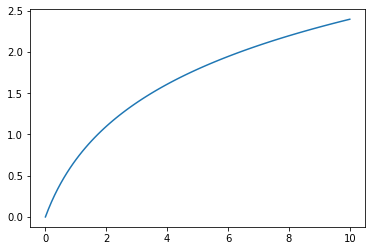

In [92]:
x = np.linspace(0, 10, 100)
y = np.log(x + 1)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

> **Further Reading**
>
> It is possible (and incredibly powerful) to perform element-wise operations on arrays with different shapes. This is known as broadcasting and is an advanced NumPy feature documented [here](https://numpy.org/doc/stable/user/basics.broadcasting.html).

We can vectorise our own functions for use with NumPy using `np.vectorize`, though performance will almost certainly suffer in the process. Note, there is no way in Python to make this function correspond to a new operator.

In [24]:
def random_op(x, y):
    rnd = np.random.random()
    if rnd < 0.4:
        return x + y
    elif rnd < 0.8:
        return x - y
    else:
        return x * y
    
random_op = np.vectorize(random_op)
random_op(A, B)

array([[ 6, -4],
       [10, 32]])

### Aggregations

Whereas the above operations returned arrays the same size as the original, aggregate operations will return either a single value or a smaller array. The most common of these functions are listed [here](https://www.pythonprogramming.in/numpy-aggregate-and-statistical-functions.html).

In [25]:
# Create data to play with
np.random.seed(42)
# 2 groups, 5 participants in each, 3 repeat measurements for each
arr = np.random.standard_normal(size=(2, 5, 3))

In [26]:
# Sum all elements in arr
arr.sum()

-5.644406875531123

In [143]:
# Average value for each participant over the 5 measurements
arr.mean(axis=2)

array([[ 0.33537946,  0.35157984,  0.62572439, -0.12886247, -1.1320786 ],
       [-0.42029044, -0.284893  , -0.52766543, -0.52815124, -0.17221147]])

In [144]:
# Maximum value in each group
arr.max(axis=(1, 2))

array([1.57921282, 1.46564877])

A particularly interesting pair of aggregate functions is `argmin`/`argmax`. Rather than finding the smallest/largest element, they tell you where it is.

In [146]:
# Which participant of each group had the lowest variance?
arr.var(axis=2).argmin(axis=1) + 1

array([1, 5])

> **Useful Tip**
>
> You can also reference axes using negative indices

### Accumulations

A related family of functions is accumulations. These apply a function over an axis, returning the result at each step.

In [160]:
# Cummulative sum of arr
arr = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
np.cumsum(arr, axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]])

You can find a full list of these functions by searching for the prefix "cum" on the NumPy [function list](https://numpy.org/doc/stable/reference/routines.math.html?highlight=sum).

> **Further Reading**
>
> You are also free to create your own aggregations (specifically, [reductions](https://numpy.org/doc/stable/reference/generated/numpy.ufunc.reduce.html)) and [accumulations](https://numpy.org/doc/stable/reference/generated/numpy.ufunc.accumulate.html) using the documentation linked here, though do note that these are both quite advanced features of the package.

## Filtering and Sorting

Finally, we will look at how we can filter and sort arrays. We begin with filtering.

### Filtering

We can use comparison operators with NumPy arrays to create Boolean arrays.

In [28]:
# Which rows of A have a sum greater than one? Call the result B
np.random.seed(253)
A = np.random.standard_normal(size=(10, 10))
B = np.sum(A, axis=1) > 0
B

array([ True,  True, False, False,  True,  True,  True, False,  True,
       False])

We can then use Boolean arrays to filter along an axis of an array.

In [29]:
# Select only rows with a sum greater than one
A[B]

array([[ 0.87157287, -1.13019516,  1.28219361,  3.30666723,  0.13063963,
        -0.48921038, -0.34078095, -0.59258644, -0.43519562, -1.38283849],
       [-0.57561558,  1.33532656,  0.78052562,  0.02216178,  0.65019844,
        -0.8047665 , -0.79871126,  1.63540629,  2.17077612,  0.41283895],
       [ 1.6907554 ,  2.50428286,  0.04413411, -1.32268295, -2.11490647,
        -0.34783311, -0.60986001,  0.76699829,  1.63314801, -0.55285836],
       [ 0.2685946 ,  0.93639279,  1.67594885,  0.04691898, -0.55740769,
         0.25901479,  0.41432577,  0.49404523,  0.25059384,  0.07515829],
       [-0.27629149, -0.30184233,  0.56891406,  0.17248246,  0.34852905,
         0.8985324 ,  1.55793039,  0.27827483,  0.09287503, -0.18031924],
       [ 0.40794901, -0.15202927,  0.23409006,  0.56477258,  0.4739841 ,
        -0.28150999,  0.86380105,  0.57403094, -0.30289846,  1.70773309]])

> **Review**
>
> Now that you are aware of Boolean arrays, you may want to review the aggregation functions `np.all` and `np.any`.

We can also pass in a NumPy array of indexes (which could have been obtained from `argmin`, `argsort` (see later), or `argwhere` (read docs)).

In [159]:
# Select 2nd and 4th columns using an array of indexes
A[:, np.array([1, 3])]

array([[-1.66152006, -1.2110162 ],
       [-1.12970685,  1.44156862],
       [-0.15567724,  0.25442084],
       [ 2.0754008 , -0.32602353],
       [ 1.67643731, -0.21910053],
       [-0.41528791,  2.27069286],
       [-0.47765745,  0.33366211],
       [-0.92216532,  1.35563786],
       [-0.05558467, -1.12548905],
       [ 0.47146836,  1.34542005]])

At this point you are likely wondering what happens when we run code such as `A[np.array([1, 2], [4, 2])]` or `A[A > 0]`. The answer all comes down to broadcasting, which we will not cover here, but can be read about at [this link](https://numpy.org/doc/stable/user/basics.broadcasting.html).

### Sorting Arrays

There are two ways to sort arrays in NumPy. The first is `arr.sort(...)` which returns a sorted **copy** of the original, and the second is `np.sort(arr, ...`) which sorts **in-place**. We will use the former but the same logic applies to the latter.

The only argument we need to specify in most use cases is `axis` which determines the axis to sort over. It is generally difficult to handle ties although you will find ways if you search online.

In [167]:
# Sort A over the last dimension
A = np.random.random(size=(2, 2, 2))
A.sort(axis=-1)
print(A)

[[[0.65892394 0.71597223]
  [0.02709599 0.22197216]]

 [[0.2310748  0.67189274]
  [0.01971054 0.10410858]]]


When using `np.sort()`, by setting `axis=None` we sort the flattened array.

In [170]:
# Sort the flattened array of A
np.sort(A, axis=None)

array([0.01971054, 0.02709599, 0.10410858, 0.22197216, 0.2310748 ,
       0.65892394, 0.67189274, 0.71597223])

Finally, we can use `np.argsort()` to return the indices that would result in a sorted array.

In [180]:
# Argsort A, creating B
np.random.seed(42)
A = np.random.randint(100, size=(10,))
B = A.argsort()
B

array([2, 5, 0, 4, 3, 8, 9, 6, 7, 1])

In [182]:
np.all(np.sort(A) == A[B])

True

## Wrapping Up

### Saving NumPy arrays

It is possible to save NumPy arrays to disk for later use. This isn't too common a requirement so we won't cover it in this session, but you can read more about it [here](https://numpy.org/doc/stable/reference/generated/numpy.save.html).

### Sparsity

The sparsity of an array is given by the proportion of zero elements out of all elements. When an array is highly sparse (typically >70-90% depending on the scenario), it can be stored in a different way to make operations faster and use less storage. NumPy only has the ability to work with _dense_ arrays, but thankfully, SciPy has us covered. The feature set of sparse arrays is more limited but when these meet you needs, they can often offer much faster computations with less storage requirements. Read more [here](https://docs.scipy.org/doc/scipy/reference/sparse.html).